<a class="anchor" id="0"></a>
# **Linear regression in Python**


Hello friends,
In machine learning, Linear Regression is a Simple fast and straightforward baseline model  for the Regression task. In this kernel, I Linear Regression algorithm with Python and Scikit-Learn. I build a Linear Regression to predict the Car Price.


So, let's get started.

<a class="anchor" id="0.1"></a>
# **Table of Contents**

1.	[Introduction to Linear Regression algorithm](#1)
2.	[Linear Regression algorithm intuition](#2)
3.	[Import libraries](#3)
4.	[Applications of Linear Regression algorithm](#4)
5.	[Exploratory data analysis (EDA)](#5)
6.	[Cleaning](#6)
7.	[Encoding](#7)
8.  [Transformation](#8)
9.	[Split](#9)
10.	[Scaling](#10)
11.	[Model Training](#11)
12.	[Model Evaluation Metrics](#12)
13.	[Predict the results](#13)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
import warnings

warnings.filterwarnings('ignore')

# **1. Introduction to Linear Regression algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Linear regression is a type of `supervised machine-learning algorithm` that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It assumes that there is a `linear relationship` between the input and output, meaning the output changes at a constant rate as the input changes. This relationship is represented by a straight line.

For example we want to predict a student's exam score based on how many hours they studied. We observe that as students study more hours, their scores go up. In the example of predicting exam scores based on hours studied. Here

Independent variable (input): Hours studied because it's the factor we control or observe.
Dependent variable (output): Exam score because it depends on how many hours were studied.

# **2. Linear Regression algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Think of Linear Regression as "The Best Fit Line."

Imagine you have a scatter plot of data points (like Age vs. Charges). Your goal is to draw one straight line through these points that is as close to everyone as possible.

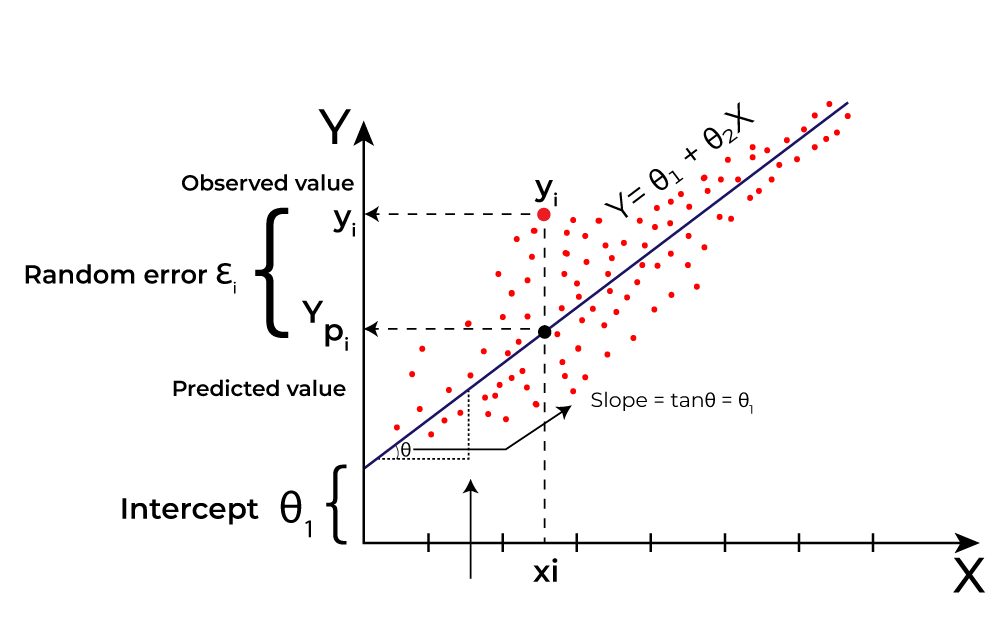

 * `The Goal:` Minimize the "Error." The error is the vertical distance between the actual dot and your line.

 * `The Method (Ordinary Least Squares):` The algorithm draws thousands of lines and calculates the square of the errors for each. The line with the lowest total error wins.


The Equation: y = mx + c

You might remember this from high school, but here is what it means in Machine Learning:
    y = beta_0 + beta_1x

 * y(Prediction): The Insurance Charge.
 * x(Feature): The Age (or BMI).
 * beta_1(Slope/Weight): How much the price goes up for every 1 year of age. (e.g., "For every birthday, add $250").
 * beta_0(Intercept/Bias): The baseline price. (e.g., "Even if you are 0 years old, the base fee is $2,000").


# **3. Import libraries** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# **4. Applications of Linear Regression algorithm** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)




Linear Regression is used whenever we want to predict a continuous number (Quantity) rather than a category (Yes/No).

1. Real Estate (Price Prediction):

      * Input: Square footage, number of bedrooms, location.

      * Output: Predicted House Price.

2. Business (Sales Forecasting):

      * Input: Ad spend, time of year, previous month's sales.

      * Output: Next month's revenue.

3. Medical (Dosage vs. Effect):

      * Input: Dosage of medicine (mg).

      * Output: Blood pressure reduction.

4. Insurance (Risk Scoring):

      * Input: Age, BMI, Location.

      * Output: Predicted claim amount (What you are doing right now!).


# **5. Exploratory data analysis (EDA)** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

**What is EDA (Exploratory Data Analysis)?**

Think of `EDA` as a medical checkup for your data before you perform surgery (build your model).

If a doctor operates without checking the patient's blood pressure or allergies, the surgery might fail. Similarly, if you train a Linear Regression model without understanding your data's "health" (skewness, outliers, missing values), your predictions will be wrong.

EDA is the process of using statistics and visualizations to:

Understand the story your data is telling.

Find "dirty" data (errors, missing values).

Discover patterns (e.g., "Do smokers always pay more?").

i. **Initial Health Check (Structure & Integrity)**

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that every Dtype is good

In [8]:
df.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


By seeing this we can say that everything is looks good because age don't have any negative value and other columns also in the correct form.

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We don't have any null values

In [10]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 1


In [11]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


**ii. Univariate Analysis (Distribution)**

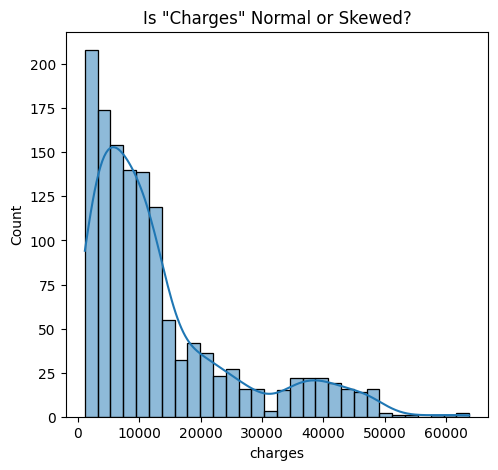

In [12]:
plt.figure(figsize=(12, 5))

# Plot 1: Target Variable Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Is "Charges" Normal or Skewed?')

plt.show()

Here we can see that our charges columns data is right skewed so we will fix this for this we need to do the log transformation

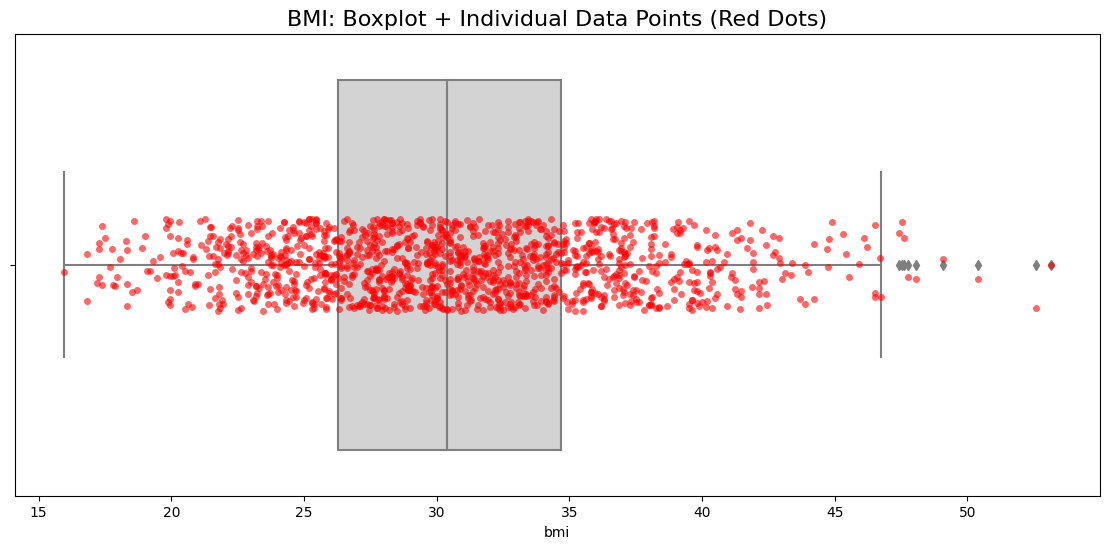

In [13]:
plt.figure(figsize=(14, 6))

# Layer 1: The Boxplot (Background)
sns.boxplot(x=df['bmi'], color='lightgray')

# Layer 2: The Strip Plot (Individual Points)
# jitter=True spreads the dots out so they don't overlap too much
sns.stripplot(x=df['bmi'], color='red', alpha=0.6, jitter=True)

plt.title('BMI: Boxplot + Individual Data Points (Red Dots)', fontsize=16)
plt.show()

We can see all the data and we can see our outliers also if we count then we can see that we have 9 outliers.

In [14]:
# 1. Calculate the Upper and Lower Limits for BMI
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# 2. Filter the data to show ONLY the outliers
outliers_df = df[(df['bmi'] < lower_limit) | (df['bmi'] > upper_limit)]

# 3. specific view
print(f"Lower Limit: {lower_limit:.2f}")
print(f"Upper Limit: {upper_limit:.2f}")
print(f"Total Outliers Found: {len(outliers_df)}")

# Display the actual rows
print("\n--- Rows with Outlier BMI ---")
print(outliers_df.sort_values(by='bmi', ascending=False))

Lower Limit: 13.70
Upper Limit: 47.29
Total Outliers Found: 9

--- Rows with Outlier BMI ---
      age     sex    bmi  children smoker     region      charges
1317   18    male  53.13         0     no  southeast   1163.46270
1047   22    male  52.58         1    yes  southeast  44501.39820
847    23    male  50.38         1     no  southeast   2438.05520
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
1088   52    male  47.74         1     no  southeast   9748.91060
860    37  female  47.60         2    yes  southwest  46113.51100
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801


In [15]:
# Correct syntax
df.groupby('sex')['bmi'].max()

sex
female    48.07
male      53.13
Name: bmi, dtype: float64

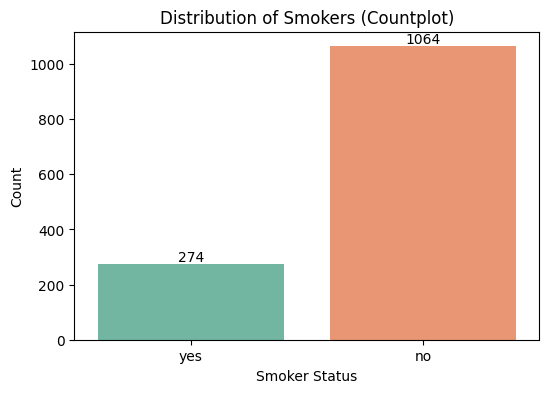


--- Smoker Balance (%) ---
smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64


In [16]:
# 1. Plot the Countplot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='smoker', data=df, palette='Set2')
plt.title('Distribution of Smokers (Countplot)')
plt.xlabel('Smoker Status')
plt.ylabel('Count')

# 2. Add exact numbers on top of the bars (Optional but helpful)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# 3. Check the exact percentage balance
print("\n--- Smoker Balance (%) ---")
print(df['smoker'].value_counts(normalize=True) * 100)

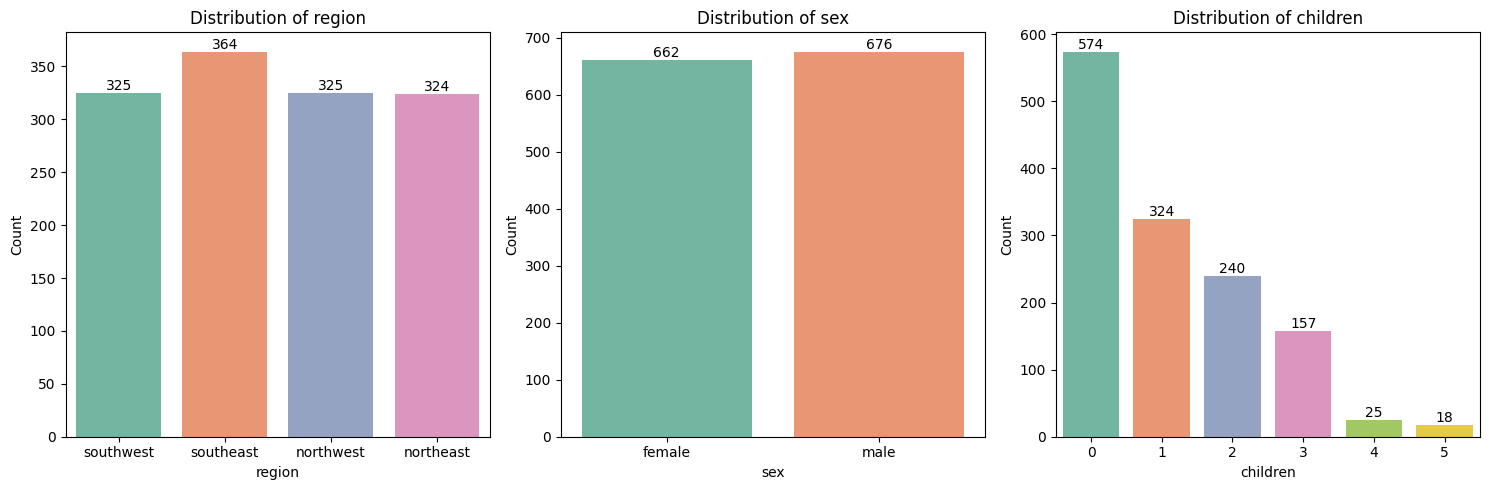


--- Detailed Breakdown (Check for Typos/Rare values) ---

[REGION]
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
------------------------------

[SEX]
sex
male      676
female    662
Name: count, dtype: int64
------------------------------

[CHILDREN]
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
------------------------------


In [17]:
columns_to_check = ['region', 'sex', 'children']

# 1. Plot Countplots Side-by-Side
plt.figure(figsize=(15, 5)) # Adjust width based on how many columns you have

for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i + 1) # 1 row, 3 columns, current plot index
    ax = sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Add labels to bars
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

# 2. Check for Typos and Imbalance (Text Output)
print("\n--- Detailed Breakdown (Check for Typos/Rare values) ---")
for col in columns_to_check:
    print(f"\n[{col.upper()}]")
    print(df[col].value_counts())
    print("-" * 30)

**iii. Bivariate Analysis (Checking relationships between two columns)**

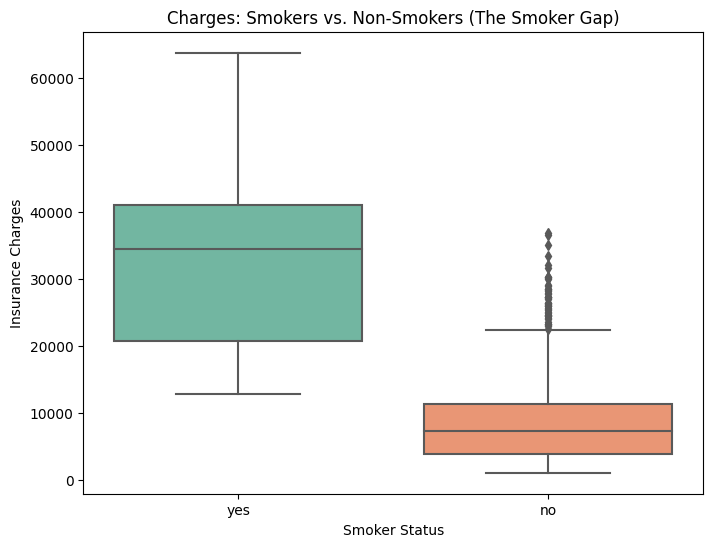


--- Median Charges ---
smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

Smokers pay roughly $27,110.94 more (approx 4.7x higher).


In [18]:
# 1. Plot the Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')

plt.title('Charges: Smokers vs. Non-Smokers (The Smoker Gap)')
plt.xlabel('Smoker Status')
plt.ylabel('Insurance Charges')
plt.show()

# 2. Verify the numbers (Calculate the Median Gap)
# We use median because charges can be skewed by outliers
medians = df.groupby('smoker')['charges'].median()
print("\n--- Median Charges ---")
print(medians)

# Calculate how much more expensive smokers are
gap = medians['yes'] - medians['no']
ratio = medians['yes'] / medians['no']
print(f"\nSmokers pay roughly ${gap:,.2f} more (approx {ratio:.1f}x higher).")

**Why Box Plot and why not barplot?**
A Boxplot shows you five key pieces of information at once, which is crucial for financial data like insurance charges:

* The `Median (The line in the middle)`: The "real" middle value, which is better than the Average for money data (because averages get distorted by rich people/expensive claims).

* The `Box (The Body)`: This holds the middle 50% of people. It shows you where the "normal" smokers actually sit.

* The `Whiskers` (The Lines): These show the range of the data (Minimum to Maximum).

* The `Dots (Outliers)`: This is the most important part! It shows the specific people who have unusually high medical bills. A Bar plot completely hides these outliers inside the average.

Summary Example
Imagine two groups of smokers:

 * Group A: Everyone pays exactly $30,000.

 * Group B: Half pay $10,000, half pay $50,000.

A Bar Plot would look identical for both groups (Average = $30k). A Boxplot would look completely different, immediately showing that Group B is much riskier and more volatile.

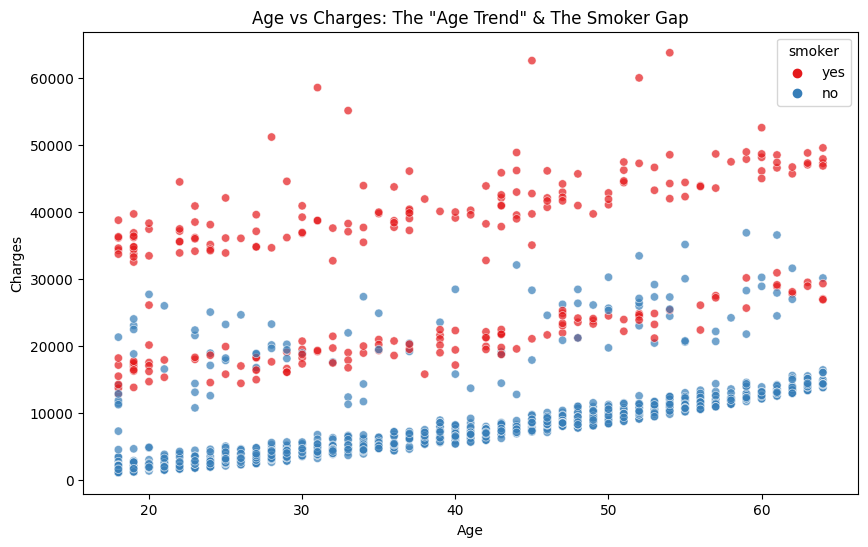

In [19]:
# 1. Create the Scatterplot for the columns of age and charges and hue is smoker
plt.figure(figsize=(10, 6))

# 'hue' is the magic parameter here: it colors the points by smoker status
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='Set1', alpha=0.7)

plt.title('Age vs Charges: The "Age Trend" & The Smoker Gap')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Observation from this `scatterplot`:

We can see that a positive trend (as age goes up, charges go up).

Deep Dive: You might notice the points form 3 distinct parallel lines.

 * Line 1 (Bottom): Healthy non-smokers.

 * Line 2 (Middle): Non-smokers with other issues?

 * Line 3 (Top): Smokers.

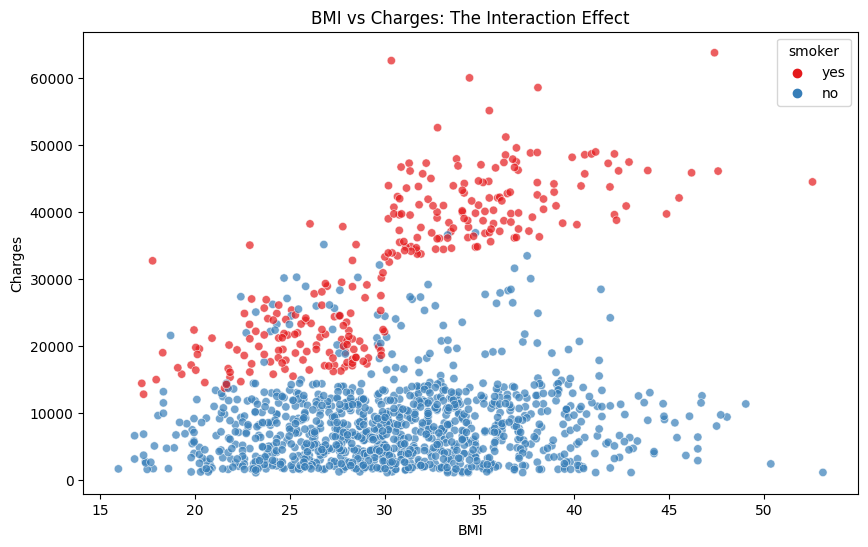

In [20]:
# 1. Create the Scatterplot for the columns of bmi and charges and hue is smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='Set1', alpha=0.7)

plt.title('BMI vs Charges: The Interaction Effect')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

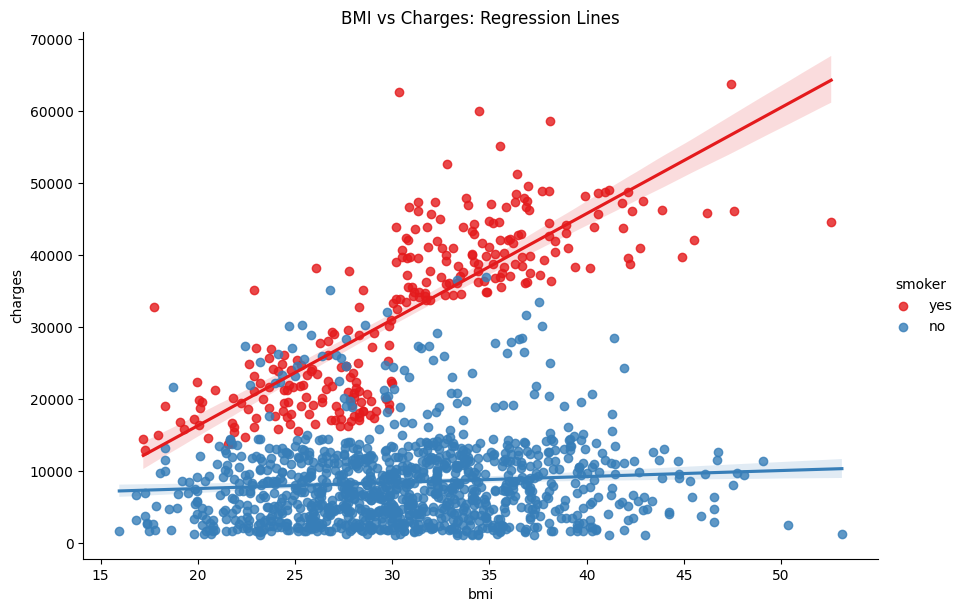

In [21]:
# 2. Regression Plot (Best for seeing the trend lines)
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set1', height=6, aspect=1.5)
plt.title('BMI vs Charges: Regression Lines')
plt.show()

Observation:

What to see:

 * For Non-smokers: BMI might not affect charges much (flat line).

 * For Smokers: As BMI goes up, charges skyrocket. This is called an Interaction Effect.

**iv). Multivariate Analysis (The Big Picture)**

`Goal:` See how everything relates to everything else.

In [22]:
# 1. Create a copy of the dataframe to avoid messing up the original data
df_temp = df.copy()

# 2. Convert text columns to numbers
# Logic: 'yes' becomes 1, 'no' becomes 0, 'male' becomes 1, etc.
# The easiest way for a heatmap is using .cat.codes or LabelEncoder
for col in df_temp.select_dtypes(include='object').columns:
    df_temp[col] = df_temp[col].astype('category').cat.codes

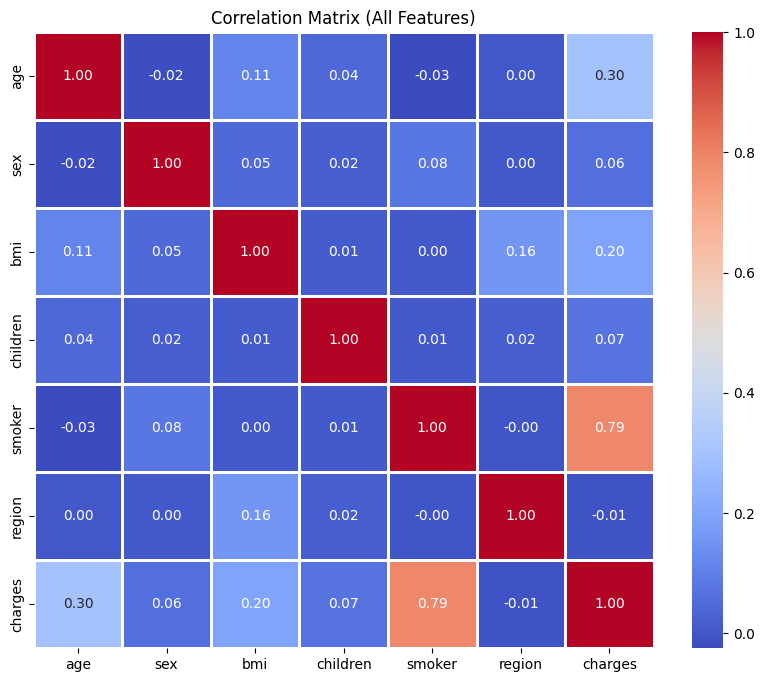

Correlation with Charges:
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64


In [23]:
# 3. Calculate the Correlation Matrix
corr_matrix = df_temp.corr()

# 4. Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.8)

plt.title('Correlation Matrix (All Features)')
plt.show()

# 5. Check specific correlations with 'charges'
print("Correlation with Charges:")
print(corr_matrix['charges'].sort_values(ascending=False))

Here we can see that for the smoking reason the charges getting high

# **6. Cleaning:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [24]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We don't have any null values

In [25]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 1


In [26]:
df.shape

(1338, 7)

In [27]:
df = df.drop_duplicates()

In [28]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [29]:
df.shape

(1337, 7)

# **6. Outliers:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In the Eda process we already seen our outliers so here we will remove our outliers with the category wise of male & female max values of `bmi`

In [30]:
# 1. Define the Outliers (Global Logic)
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
global_limit = Q3 + 1.5 * IQR

# 2. Identify the rows that are outliers
outlier_mask = df['bmi'] > global_limit

# 3. Calculate the Max of the "Normal" data (excluding outliers)
# We filter the dataframe using '~outlier_mask' (meaning: NOT outlier)
clean_max_values = df[~outlier_mask].groupby('sex')['bmi'].max()

print("Replacement Values (Max of normal data):")
print(clean_max_values)

# 4. Replace outliers with those specific values
# We map the clean max values to the 'sex' column
df['bmi'] = np.where(
    outlier_mask,                     # If it is an outlier...
    df['sex'].map(clean_max_values),  # Replace with that gender's clean max
    df['bmi']                         # Otherwise, keep original
)

Replacement Values (Max of normal data):
sex
female    46.75
male      46.53
Name: bmi, dtype: float64


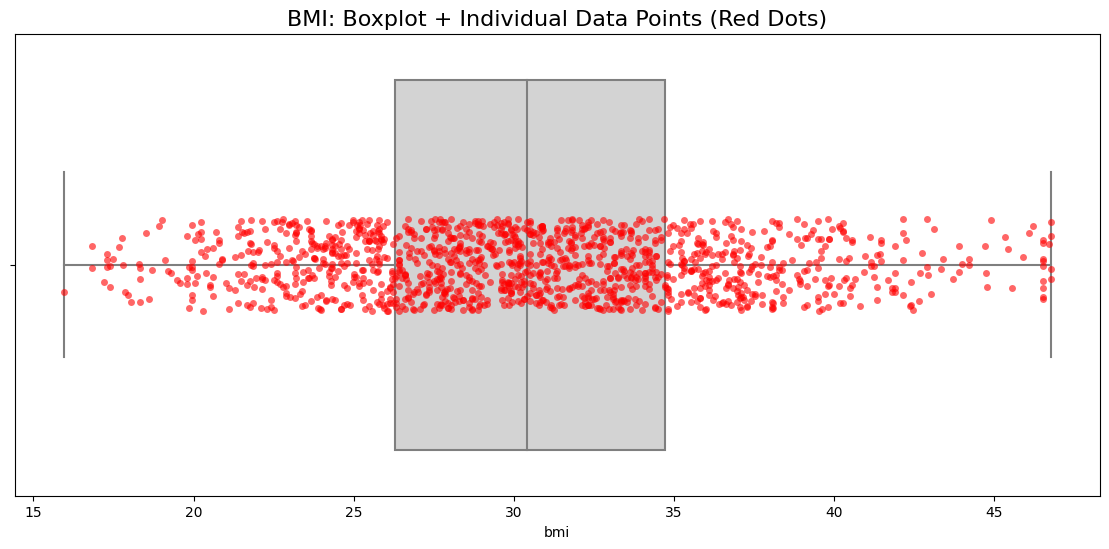

In [31]:
# After removing the outliers our data now looks like this
plt.figure(figsize=(14, 6))

# Layer 1: The Boxplot (Background)
sns.boxplot(x=df['bmi'], color='lightgray')

# Layer 2: The Strip Plot (Individual Points)
# jitter=True spreads the dots out so they don't overlap too much
sns.stripplot(x=df['bmi'], color='red', alpha=0.6, jitter=True)

plt.title('BMI: Boxplot + Individual Data Points (Red Dots)', fontsize=16)
plt.show()

# **7. Encoding:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [32]:
# --- Step 1: Label Encode Binary Columns (Sex & Smoker) ---
# We use .map() to be explicit about which text gets which number.

# Sex: female -> 0, male -> 1 (or vice versa, just remember which is which)
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

# Smoker: no -> 0, yes -> 1 (High impact feature!)
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})


# --- Step 2: One-Hot Encode 'Region' ---
# pd.get_dummies creates new columns (region_northwest, region_southeast, etc.)
# drop_first=True removes the first one to prevent the "Dummy Variable Trap"

df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [33]:
# Select the region columns and convert them
cols_to_fix = ['region_northwest', 'region_southeast', 'region_southwest']
df[cols_to_fix] = df[cols_to_fix].astype(int)

In [34]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


# **8. Transformation:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In the eda section we have seen that our charges data is `right skwed` so for that we are using the `Log Transformation`

* Goal: `Right Skwed` ---> `Normal Distribution`

   age  sex     bmi  children  smoker   charges  region_northwest  \
0   19    0  27.900         0       1  9.734236                 0   
1   18    1  33.770         1       0  7.453882                 0   
2   28    1  33.000         3       0  8.400763                 0   
3   33    1  22.705         0       0  9.998137                 1   
4   32    1  28.880         0       0  8.260455                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


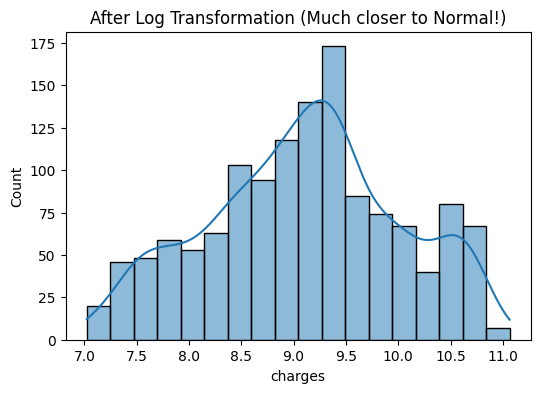

In [35]:
# 1. Apply Log Transformation
import numpy as np

# This single line calculates the log values and immediately replaces the old 'charges' column
df['charges'] = np.log1p(df['charges'])

# Check the head to confirm 'charges' now has small values (e.g., 9.1, 8.5) instead of thousands
print(df.head())
# 2. Check the new distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['charges'], kde=True)
plt.title('After Log Transformation (Much closer to Normal!)')
plt.show()

In [36]:
# Verify it is gone
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [37]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,9.734236,0,0,1
1,18,1,33.770,1,0,7.453882,0,1,0
2,28,1,33.000,3,0,8.400763,0,1,0
3,33,1,22.705,0,0,9.998137,1,0,0
4,32,1,28.880,0,0,8.260455,1,0,0


# **9. Split:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [38]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,9.734236,0,0,1
1,18,1,33.770,1,0,7.453882,0,1,0
2,28,1,33.000,3,0,8.400763,0,1,0
3,33,1,22.705,0,0,9.998137,1,0,0
4,32,1,28.880,0,0,8.260455,1,0,0


In [39]:
# Shape before splitting
df.shape

(1337, 9)

In [40]:
# 1. Separate Features (X) and Target (y)
# X contains all columns EXCEPT 'charges'
X = df.drop('charges', axis=1)

# y contains ONLY 'charges'
y = df['charges']

# 2. Perform the Split (80% Train, 20% Test)
# random_state=42 ensures you get the exact same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Verify the shapes (Good practice to ensure it worked)
print(f"Training set shape (Rows, Cols): {X_train.shape}")
print(f"Testing set shape (Rows, Cols): {X_test.shape}")

Training set shape (Rows, Cols): (1069, 8)
Testing set shape (Rows, Cols): (268, 8)


Here we split our data and we can see the shape of our dataset now.

In [41]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

**You must do scaling AFTER the train-test split:**

This is one of the most common mistakes in Machine Learning.

`The Golden Rule:` Split First, Scale Later

 1. Split your data into Training and Testing sets.
 2. Fit the scaler on the Training set only.
 3. Transform the Training set.
 4. Transform the Testing set (using the logic learned from the Training set).

**Why?** ( The "Data Leakage" Problem)
If you scale the entire dataset before splitting, your model "peeks" at the test data.

 * Scenario A (Wrong - Scaling Before): You calculate the Mean of the entire dataset (including test rows) to do the scaling. Your model now knows the statistical properties of the test set before it has even seen it. This gives you falsely high accuracy scores that won't work in the real world.

 * Scenario B (Correct - Scaling After): You calculate the Mean of only the training data. You treat the test data as if it were brand new, unseen data from the real world.

# **10. Scaling:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [42]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.645456,1.095737,0.204936,9.100097,0.242334,0.272251,0.243082
std,14.044333,0.500163,6.046742,1.205571,0.403806,0.918551,0.428655,0.445285,0.429104
min,18.000000,0.000000,15.960000,0.000000,0.000000,7.023647,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.290000,0.000000,0.000000,8.465341,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9.147098,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,9.720689,0.000000,1.000000,0.000000
max,64.000000,1.000000,46.750000,5.000000,1.000000,11.063061,1.000000,1.000000,1.000000


In [43]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,9.734236,0,0,1
1,18,1,33.770,1,0,7.453882,0,1,0
2,28,1,33.000,3,0,8.400763,0,1,0
3,33,1,22.705,0,0,9.998137,1,0,0
4,32,1,28.880,0,0,8.260455,1,0,0


In [44]:
# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. List the columns that need scaling (Continuous numbers)
# We leave 'sex', 'smoker', and 'region_*' alone because they are already 0/1.
cols_to_scale = ['age', 'bmi', 'children']

# 3. Fit and Transform the Training Data
# This calculates Mean and Std Dev from X_train and applies the math
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# 4. Transform the Testing Data
# CRITICAL: Use the scaler you just fit on Train. Do NOT fit it again on Test.
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# 5. Verify the result
print("--- Training Set After Scaling (First 5 Rows) ---")
print(X_train.head())

# Check the stats: Mean should be ~0 and Std should be ~1 for these columns
print("\n--- Verification of Age Statistics ---")
print(f"Mean: {X_train['age'].mean():.2f}")
print(f"Std:  {X_train['age'].std():.2f}")

--- Training Set After Scaling (First 5 Rows) ---
           age  sex       bmi  children  smoker  region_northwest  \
1114 -1.157680    1 -1.003744 -0.907908       0                 0   
968  -1.300619    1 -0.797503  0.766904       0                 0   
599   0.914926    0  1.169716  0.766904       0                 1   
170   1.701087    1  1.828518 -0.907908       0                 0   
275   0.557580    0 -0.654721  0.766904       0                 0   

      region_southeast  region_southwest  
1114                 0                 0  
968                  0                 0  
599                  0                 0  
170                  1                 0  
275                  0                 0  

--- Verification of Age Statistics ---
Mean: 0.00
Std:  1.00


1. The Statistics are Correct (Mean ≈ 0, Std = 1)

  * You verified that Mean = 0.00 and Std = 1.00. This is the hallmark of StandardScaler. It confirms that the math worked and your age column is now "centered."

2. The Values Make Sense (Z-Scores)
Look at the age column for the first row (-1.15).

  * `What this means:` This person is 1.15 standard deviations younger than the average.

  * `Context:` If the average age is 39, this person is likely in their early 20s.

  * `Why it's good:` The model no longer sees "Age = 19" vs "Salary = 50,000". It sees "Age Score = -1.15" vs "Salary Score = -0.8". They are now on the same playing field.

3. You Handled Categorical Data Correctly
This is the most important part.

  * `Continuous Columns (age, bmi, children):` These have been converted to decimals (floats). This is correct.

  * `Binary Columns (sex, smoker, region_*):` It appears these stayed as 0 and 1.

This is excellent practice. Many beginners make the mistake of applying StandardScaler to the dummy variables (turning 0 and 1 into weird numbers like -0.4 and 1.2). While that isn't technically "wrong," keeping them as 0/1 is usually better for interpretability, as it preserves the clear "Yes/No" logic.

Quick Note on "Children"
You might notice children is now `-0.907908`.

  * Don't panic! It looks weird to have "negative children," but for the algorithm, this just means "fewer children than the average." The model understands this perfectly.

# **11. Model Training:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [45]:

# 1. Initialize the Model
lr_model = LinearRegression()

# 2. Fit the Model (Train it)
# This is where the math happens. The model learns the relationship between X_train and y_train.
lr_model.fit(X_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


# **12. Model Evaluation Metrics:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [46]:

# 1. Make Predictions (Result is still in Log Scale)
y_pred_log = lr_model.predict(X_test)

# 2. Convert Log values back to Real Dollars (Inverse Transformation)
# We use np.expm1() because we used np.log1p() earlier
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# 3. Evaluate the Model (On Real Dollar values)
r2 = r2_score(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

# 4. Print Results
print(f"Model Accuracy (R2 Score): {r2:.4f} (or {r2*100:.2f}%)")
print(f"Average Error (MAE):       ${mae:.2f}")
print(f"Root Mean Squared Error:   ${rmse:.2f}")

# --- Optional: See the difference side-by-side ---
results_df = pd.DataFrame({
    'Actual Price': y_test_actual,
    'Predicted Price': y_pred_actual,
    'Difference': y_test_actual - y_pred_actual
})

print("\n--- First 5 Predictions ---")
print(results_df.head())

Model Accuracy (R2 Score): 0.7187 (or 71.87%)
Average Error (MAE):       $3757.07
Root Mean Squared Error:   $7189.39

--- First 5 Predictions ---
      Actual Price  Predicted Price   Difference
900     8688.85885      7596.119138  1092.739712
1064    5708.86700      5817.067935  -108.200935
1256   11436.73815     13620.353509 -2183.615359
298    38746.35510     28981.610864  9764.744236
237     4463.20510      5466.589080 -1003.383980


# **13. Predict the results:** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [47]:
# ==========================================
# 1. USER INPUT (CHANGE THESE VALUES)
# ==========================================
new_age = 36
new_sex = 'male'       # 'male' or 'female'
new_bmi = 30.5
new_children = 2
new_smoker = 'no'      # 'yes' or 'no'
new_region = 'southeast' # 'southwest', 'southeast', 'northwest', 'northeast'
# ==========================================

# 2. Convert Data into a DataFrame (Matching your training columns)
# We start with 0s for regions and fill the correct one later
input_data = pd.DataFrame({
    'age': [new_age],
    'sex': [1 if new_sex == 'male' else 0],
    'bmi': [new_bmi],
    'children': [new_children],
    'smoker': [1 if new_smoker == 'yes' else 0],
    'region_northwest': [0],
    'region_southeast': [0],
    'region_southwest': [0]
})

# 3. Set the Region Correctly
if new_region == 'northwest':
    input_data['region_northwest'] = 1
elif new_region == 'southeast':
    input_data['region_southeast'] = 1
elif new_region == 'southwest':
    input_data['region_southwest'] = 1
# Note: If 'northeast', all region columns remain 0 (Baseline)

# 4. Scale the Numerical Columns
# CRITICAL: We use the *same scaler* you created during training
cols_to_scale = ['age', 'bmi', 'children']
input_data[cols_to_scale] = scaler.transform(input_data[cols_to_scale])

# 5. Predict (Result is in Log Scale)
log_prediction = lr_model.predict(input_data)

# 6. Convert Log -> Real Money
real_price = np.expm1(log_prediction)[0]

# --- DISPLAY RESULT ---
print(f"💰 Predicted Insurance Charges: ${real_price:,.2f}")

💰 Predicted Insurance Charges: $5,827.57


In [48]:
# ==========================================
# 1. USER INPUT (CHANGE THESE VALUES)
# ==========================================
new_age = 36
new_sex = 'male'       # 'male' or 'female'
new_bmi = 30.5
new_children = 2
new_smoker = 'yes'      # 'yes' or 'no'
new_region = 'southeast' # 'southwest', 'southeast', 'northwest', 'northeast'
# ==========================================

# 2. Convert Data into a DataFrame (Matching your training columns)
# We start with 0s for regions and fill the correct one later
input_data = pd.DataFrame({
    'age': [new_age],
    'sex': [1 if new_sex == 'male' else 0],
    'bmi': [new_bmi],
    'children': [new_children],
    'smoker': [1 if new_smoker == 'yes' else 0],
    'region_northwest': [0],
    'region_southeast': [0],
    'region_southwest': [0]
})

# 3. Set the Region Correctly
if new_region == 'northwest':
    input_data['region_northwest'] = 1
elif new_region == 'southeast':
    input_data['region_southeast'] = 1
elif new_region == 'southwest':
    input_data['region_southwest'] = 1
# Note: If 'northeast', all region columns remain 0 (Baseline)

# 4. Scale the Numerical Columns
# CRITICAL: We use the *same scaler* you created during training
cols_to_scale = ['age', 'bmi', 'children']
input_data[cols_to_scale] = scaler.transform(input_data[cols_to_scale])

# 5. Predict (Result is in Log Scale)
log_prediction = lr_model.predict(input_data)

# 6. Convert Log -> Real Money
real_price = np.expm1(log_prediction)[0]

# --- DISPLAY RESULT ---
print(f"💰 Predicted Insurance Charges: ${real_price:,.2f}")

💰 Predicted Insurance Charges: $27,118.41
